# **Capstone Project: An ML Approach to Employee Salary Prediction**

**Problem Statement:** Accurately predicting an individual's income level based on various demographic and employment-related factors is a complex task with implications for workforce planning, resource allocation, and understanding socio-economic disparities. The presence of categorical data and the need to identify the most influential features pose significant challenges in building an effective predictive model.

**Goal:** The goal of this project is to develop and evaluate several machine learning models to predict whether an employee's income is above or below $50K per year, using a dataset containing various personal and professional attributes.

**Purpose:** The purpose of this project is to demonstrate the application of machine learning techniques to a real-world classification problem. By exploring different algorithms, handling categorical data, and evaluating model performance, this project aims to identify the most effective model for predicting employee income and to gain insights into the factors that contribute to higher earning potential. The deployed model can potentially be used for various applications such as targeted recruitment, policy analysis, or understanding income distributions.

**About Dataset:** This dataset contains information about individuals and their income levels, with the goal of predicting whether an individual's income is above or below $50K. It includes both numerical and categorical features such as age, workclass, education, marital status, occupation, relationship, race, gender, capital gain, capital loss, hours per week, and native country. The dataset initially contains over **48,000 entries** and **15 columns**.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [43]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, classification_report

import pickle

### Load Dataset

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("adult 3.csv")

# Display first few rows of the dataframe
df0.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Gather descriptive statistics about the data
df0.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Check for missing values
df0.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [8]:
# Check for duplicates
df0.duplicated().sum()

np.int64(52)

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# Display last few rows of new dataframe as needed
df1.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## Step 2. Data Exploration (EDA)


In [13]:
# Display value count in 'workclass' column
df1['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
?,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [14]:
# Replace '?' with 'Others'.
df1['workclass'].replace({'?':'Others'}, inplace = True)

# Again Display value count in 'workclass' column
df1['workclass'].value_counts()

/tmp/ipython-input-14-262616842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['workclass'].replace({'?':'Others'}, inplace = True)
/tmp/ipython-input-14-262616842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['workclass'].replace({'?':'Others'}, inplace = True)


,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
Others,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [15]:
# Drop 'Without-pay, 'Never-worked' values as those employee won't be contributing in salary predictions
df1 = df1[df1['workclass'] != 'Never-worked']
df1 = df1[df1['workclass'] != 'Without-pay']

# Again Display value count in 'workclass' column
df1['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
Others,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432


In [16]:
# Check 'occupation' column for unsual values.
df1['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6101
Exec-managerial,6081
Adm-clerical,5603
Sales,5500
Other-service,4917
Machine-op-inspct,3015
?,2795
Transport-moving,2354


In [17]:
# Replace '?' with 'Others'.
df1['occupation'].replace({'?':'Others'}, inplace = True)

# Again Display value count in 'occupation' column
df1['occupation'].value_counts()

/tmp/ipython-input-17-1218846498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['occupation'].replace({'?':'Others'}, inplace = True)


,count
occupation,
Prof-specialty,6165
Craft-repair,6101
Exec-managerial,6081
Adm-clerical,5603
Sales,5500
Other-service,4917
Machine-op-inspct,3015
Others,2795
Transport-moving,2354


Text(0.5, 1.0, 'Gender Distribution')

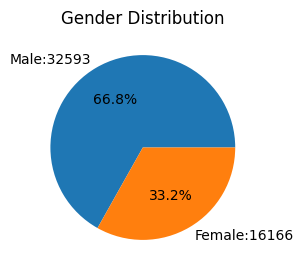

In [18]:
# plot pie chart to check proportion of 'gender' column.
fig = plt.figure(figsize = (3,3))
data = df1['gender'].value_counts()
plt.pie(data,
       labels = [
           f'{data.index[0]}:{data.values[0]}',
           f'{data.index[1]}:{data.values[1]}'],
           autopct = '%1.1f%%'
       )
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Income Distribution Analysis')

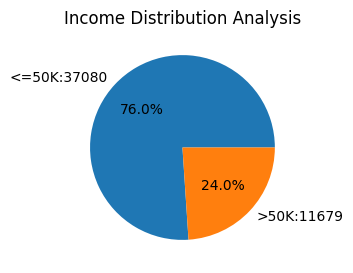

In [19]:
# plot pie chart to check proportion of 'income' column.
fig = plt.figure(figsize = (3,3))
data = df1['income'].value_counts()
plt.pie(data,
       labels = [
           f'{data.index[0]}:{data.values[0]}',
           f'{data.index[1]}:{data.values[1]}'],
           autopct = '%1.1f%%'
       )
plt.title("Income Distribution Analysis")

In [20]:
# check unique values in the country column
df1['native-country'].value_counts()

,count
native-country,
United-States,43762
Mexico,943
?,856
Philippines,293
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


Text(0.5, 1.0, 'Count of Employees as per department')

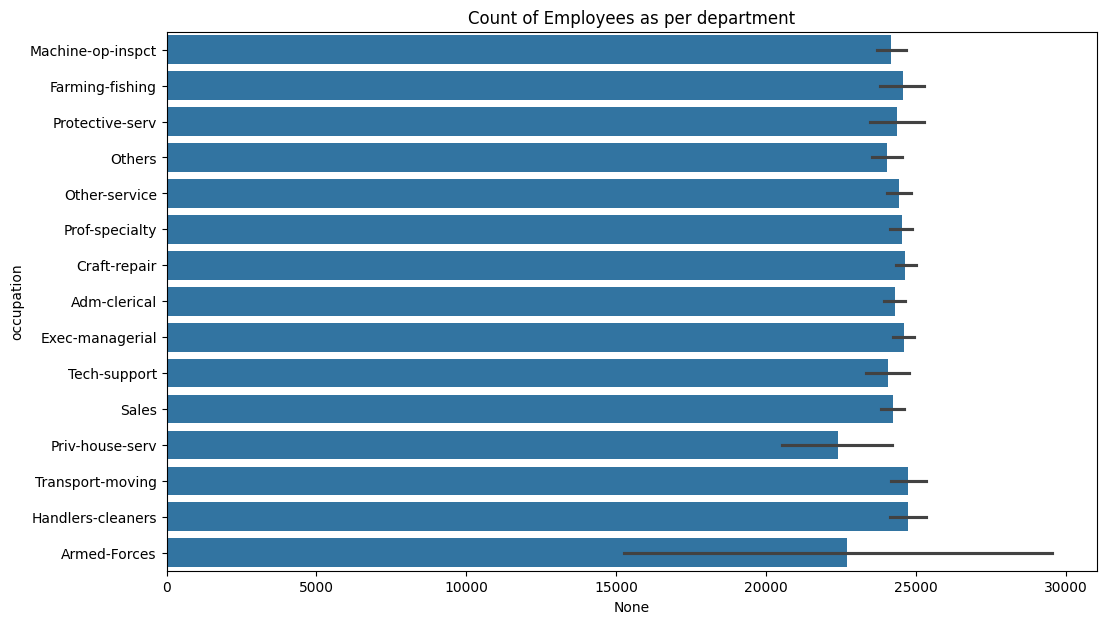

In [21]:
# Barplot for 'occupation' column
plt.figure(figsize = (12,7))
sns.barplot(x = df1.index, y = df1['occupation'])
plt.title('Count of Employees as per department')

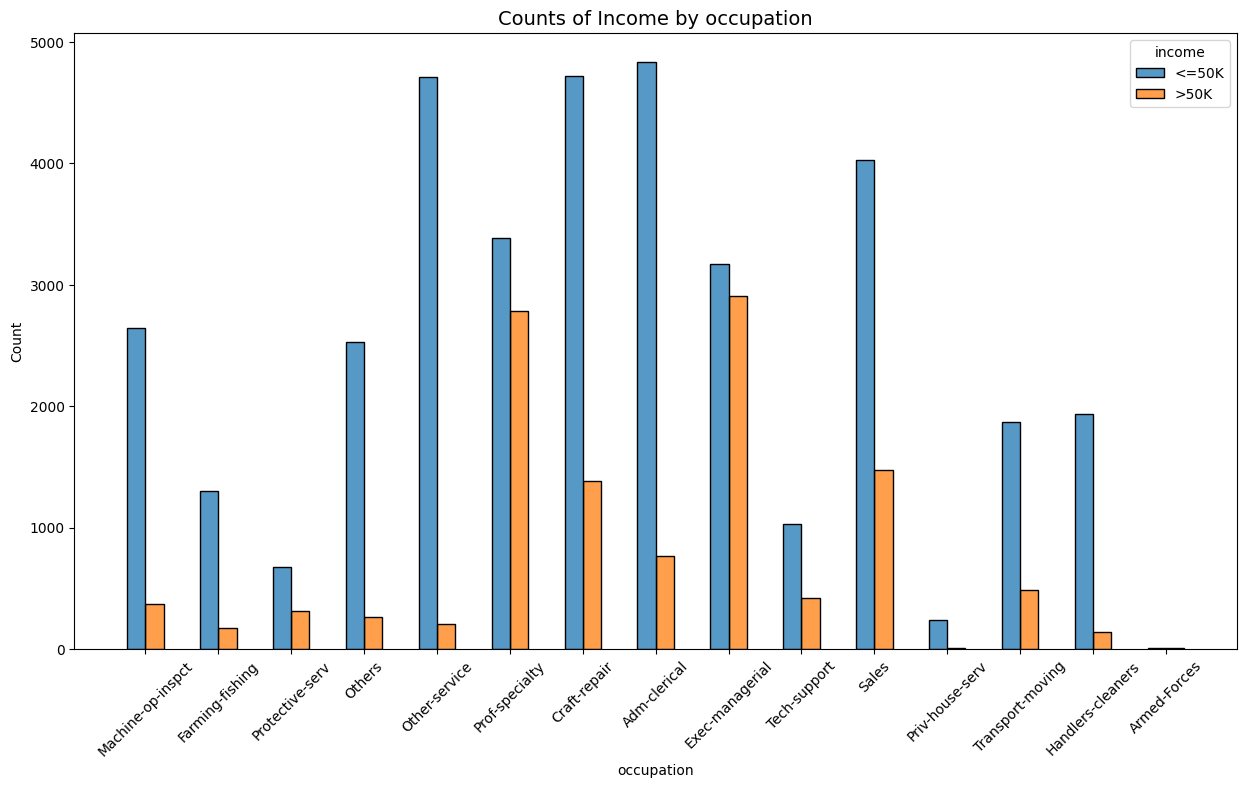

In [22]:
# Create stacked histogram to compare occupation distribution of employees whose salary is greater or less than 50K.
plt.figure(figsize=(15,8))
sns.histplot(data=df1, x='occupation', hue='income', discrete=1,  multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of Income by occupation', fontsize=14);


Text(0.5, 1.0, 'Age Distribution of Employees')

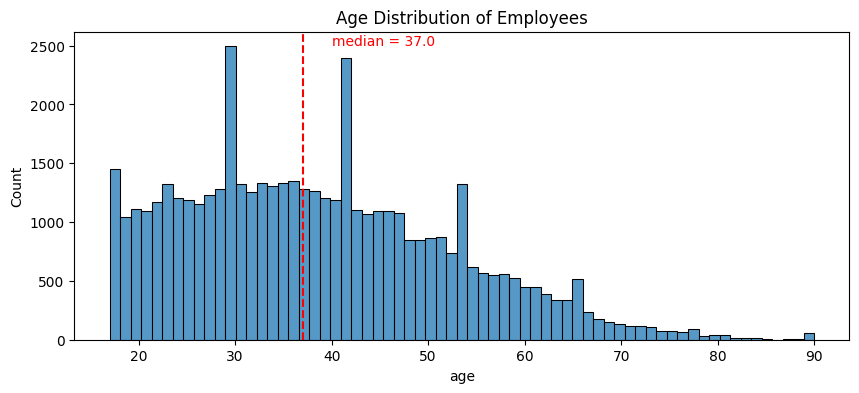

In [23]:
# Check Age Distribution of employees
plt.figure(figsize = (10,4))
sns.histplot(x = df1['age'])
median = df1['age'].median()
plt.axvline(median, color = 'red', linestyle = '--')
plt.text(40, 2500, f'median = {median}',color = 'red')
plt.title('Age Distribution of Employees')

In [24]:
# check count of 'race' in data.
df1['race'].value_counts()

,count
race,
White,41688
Black,4679
Asian-Pac-Islander,1516
Amer-Indian-Eskimo,470
Other,406


In [25]:
# drop 'education' column as it is redundant column
df1=df1.drop(columns=['education'])

In [26]:
# Encode the categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [27]:
df1['workclass'] = encoder.fit_transform(df1['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
df1['marital-status'] = encoder.fit_transform(df1['marital-status'])   #3 categories 0, 1, 2
df1['occupation'] = encoder.fit_transform(df1['occupation'])
df1['relationship'] = encoder.fit_transform(df1['relationship'])      #5 categories  0, 1, 2, 3, 4
df1['race'] = encoder.fit_transform(df1['race'])
df1['gender'] = encoder.fit_transform(df1['gender'])    #2 catogories     0, 1
df1['native-country'] = encoder.fit_transform(df1['native-country'])

In [28]:
# Encode the 'income' column  as well.
df1['income'] = encoder.fit_transform(df1['income'])

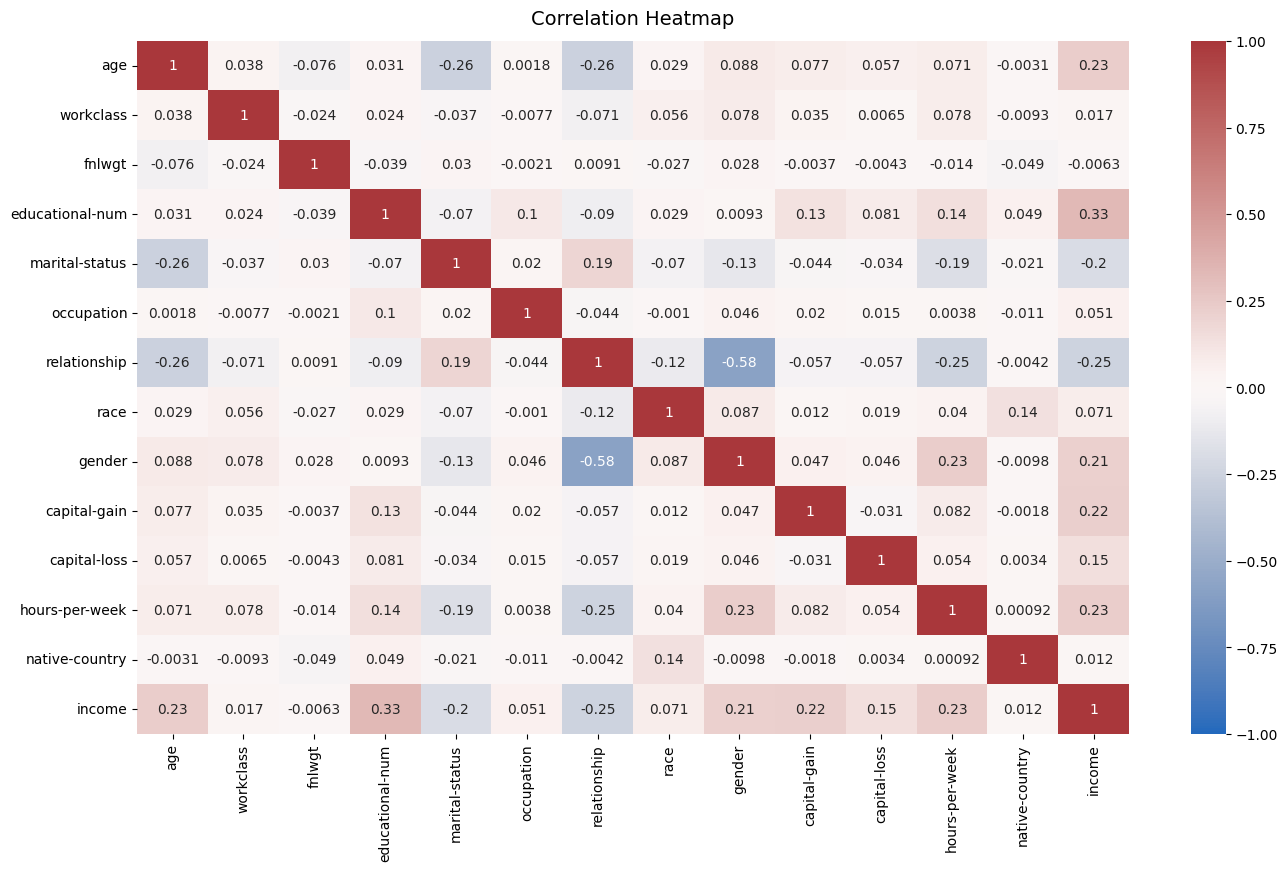

In [29]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Least or variables that are not correlated to income column are: -
- workclass
- fnlwgt
- occupation
- race
- native-country

These variables can be dropped as they won't contribute to salary prediction.


In [30]:
df2 = df1.drop(columns=['workclass','fnlwgt','occupation','race','native-country'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48759 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48759 non-null  int64
 1   educational-num  48759 non-null  int64
 2   marital-status   48759 non-null  int64
 3   relationship     48759 non-null  int64
 4   gender           48759 non-null  int64
 5   capital-gain     48759 non-null  int64
 6   capital-loss     48759 non-null  int64
 7   hours-per-week   48759 non-null  int64
 8   income           48759 non-null  int64
dtypes: int64(9)
memory usage: 3.7 MB


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables

In [31]:
# Select the features you want to use in your model
X = df2.drop('income', axis=1)

# Isolate the outcome variable
y = df1['income']


In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "KNNClassifier": KNeighborsClassifier(),
    "XGBoostClassifier": XGBClassifier()
}

results = {}

for name, model in models.items():
    if name == "XGBoostClassifier":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8183
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      9270
           1       0.69      0.44      0.53      2920

    accuracy                           0.82     12190
   macro avg       0.77      0.69      0.71     12190
weighted avg       0.81      0.82      0.80     12190

Decision Tree Accuracy: 0.8280
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9270
           1       0.66      0.57      0.61      2920

    accuracy                           0.83     12190
   macro avg       0.77      0.74      0.75     12190
weighted avg       0.82      0.83      0.82     12190

RandomForest Accuracy: 0.8433
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9270
           1       0.70      0.60      0.65      2920

    accuracy                           0.84     12190
   macro avg       0.79      0

/tmp/ipython-input-34-2341486504.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


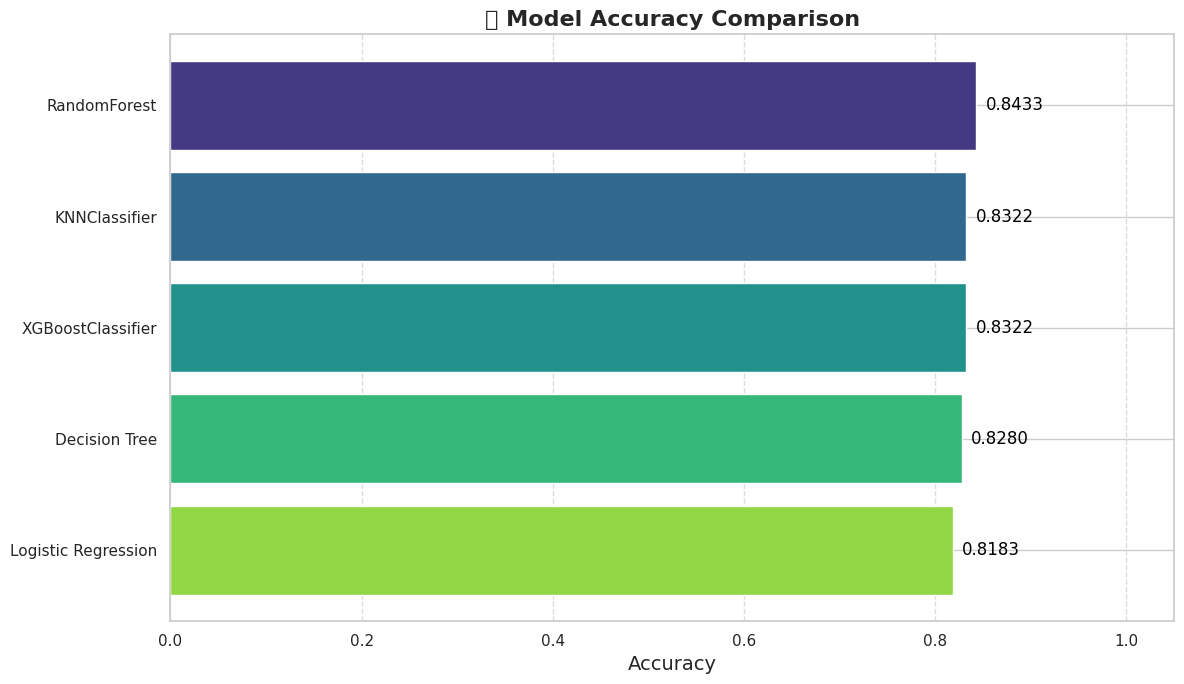

In [34]:
# Sort results by accuracy (highest first)
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Set plot style
sns.set(style="whitegrid")
colors = sns.color_palette("viridis", len(sorted_results))  # Smooth gradient colors

# Create plot
plt.figure(figsize=(12, 7))
bars = plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color=colors)

# Annotate accuracy values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f"{width:.4f}", va='center', fontsize=12, color='black')

# Customize plot
plt.xlabel("Accuracy", fontsize=14)
plt.title("🔍 Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Champion model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

Champion model: RandomForest with accuracy 0.8433


In [37]:
import joblib
# save the Champion model
joblib.dump(best_model, "Champion_model.pkl")
print("✅ Saved best model as Champion_model.pkl")

✅ Saved best model as Champion_model.pkl


## Step 4. Deploy the saved model.

In [38]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# 🔹 Load the trained model
model = joblib.load("Champion_model.pkl")

# 🔹 Page configuration
st.set_page_config(
    page_title="Employee Salary Classification",
    page_icon="💼",
    layout="centered"
)

# 🔹 App Title
st.title("💼 Employee Salary Classification")
st.markdown("Use this app to predict whether an employee earns >50K or ≤50K based on various inputs.")

# ─────────────────────────────────────────────────────────────
# Sidebar: User Inputs
# ─────────────────────────────────────────────────────────────
st.sidebar.header("📝 Enter Employee Details")

# 🌟 Input fields (should match the training data's feature names)
age = st.sidebar.slider("Age", 18, 65, 30)

education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])

occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])

hours_per_week = st.sidebar.slider("Hours per Week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# 🔹 Create input DataFrame (column names must match model's expectation)
input_df = pd.DataFrame({
    "age": [age],
    "education": [education],
    "occupation": [occupation],
    "hours-per-week": [hours_per_week],
    "experience": [experience]
})

# 🔹 Display input
st.subheader("🔍 Preview of Input Data")
st.dataframe(input_df)

# ─────────────────────────────────────────────────────────────
# Single Prediction
# ─────────────────────────────────────────────────────────────
if st.button("🔮 Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# ─────────────────────────────────────────────────────────────
# Batch Prediction Section
# ─────────────────────────────────────────────────────────────
st.markdown("---")
st.subheader("📂 Batch Prediction (Upload CSV)")

uploaded_file = st.file_uploader("Upload a CSV file with employee data", type="csv")

if uploaded_file:
    batch_data = pd.read_csv(uploaded_file)
    st.write("📄 Uploaded Data Preview:")
    st.dataframe(batch_data.head())

    # 🔹 Make predictions
    batch_preds = model.predict(batch_data)
    batch_data["PredictedClass"] = batch_preds

    # 🔹 Show results
    st.success("✅ Batch predictions complete!")
    st.write(batch_data.head())

    # 🔹 Download button
    csv = batch_data.to_csv(index=False).encode("utf-8")
    st.download_button(
        label="📥 Download Predictions as CSV",
        data=csv,
        file_name="predicted_classes.csv",
        mime="text/csv"
    )


Writing app.py


In [39]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [40]:
!ngrok authtoken 30ExLK2yDH73ImYhMUlfbrV518q_87wDqbXdQGMkeiis6A7wV

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [41]:
# write code for Generating App link to streamlit
import os
import threading

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target = run_streamlit)
thread.start()

In [47]:

from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print('Your streamlit URL is :- ', public_url)

Your streamlit URL is :-  NgrokTunnel: "https://4e12a070f9cb.ngrok-free.app" -> "http://localhost:8501"
